**NOMBRE ALUMNO:** Jonathan Rodriguez

**FECHA:** 21-11-19

### Desafío 1: Prepare el ambiente de trabajo

* Importe las librerías básicas para el análisis de datos.
* Incluya los import base de statsmodels .
* Importe la base de datos Credit.csv y elimine la columna Unnamed: 0 .
* Siguiendo las buenas prácticas, genere variables binarias para capturar el efecto del grupo minoritario en cada variable. Para el caso de Ethnicity , genere binarias para African American y Asian .

tip: Utilice value_counts() para revisar la cantidad de casos en las variables categóricas.


#### Sobre la base de datos

En esta actividad trabajaremos con un registro de clientes de un banco e información sobre su salud financiera. La base contenida en el csv Credit contiene las siguientes variables:

* Income: Ingreso anual disponible en miles de dólares.
* Limit: Límite del crédito.
* Rating: Ranking del crédito.
* Cards: Cantidad de tarjetas de credito.
* Age: Edad del usuario.
* Education: Años de educación del usuario.
* Gender: ¿Hombre o mujer?
* Student: ¿Es estudiante?
* Married: ¿Está casado?
* Ethnicity: Etnicidad del usuario (Caucásico, Afroamericano, Asiático)
* Balance: Promedio de deuda en tarjeta de crédito de usuario.

Para efectos prácticos del ejercicio, nos interesa saber sobre los determinantes de la variación en el promedio de deuda en tarjeta de crédito. A lo largo del ejercicio generaremos modelos econométricos para inspeccionar los efectos de distintos atributos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
plt.style.use('seaborn')


df_original = pd.read_csv('Credit.csv').drop(columns='Unnamed: 0')

df_original.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [2]:
df_original.dtypes # Objects vendrían siendo las variables categóricas

Income       float64
Limit          int64
Rating         int64
Cards          int64
Age            int64
Education      int64
Gender        object
Student       object
Married       object
Ethnicity     object
Balance        int64
dtype: object

In [3]:
# separemos todas las variables que son categóricas
categorical_columns = ['Gender','Student', 'Married', 'Ethnicity']
# iniciamos un loop para cada variable categórica donde:
for cat in categorical_columns:
    # imprimimos el nombre
    print("\n",cat)
    # solicitamos la frecuencia relativa de cada categoría dentro de la variable
    print(df_original[cat].value_counts())
    # solicitamos el porcentaje de la frecuencia relativa
    print((df_original[cat].value_counts()/len(df_original[cat])))
    print("\n")


 Gender
Female    207
 Male     193
Name: Gender, dtype: int64
Female    0.5175
 Male     0.4825
Name: Gender, dtype: float64



 Student
No     360
Yes     40
Name: Student, dtype: int64
No     0.9
Yes    0.1
Name: Student, dtype: float64



 Married
Yes    245
No     155
Name: Married, dtype: int64
Yes    0.6125
No     0.3875
Name: Married, dtype: float64



 Ethnicity
Caucasian           199
Asian               102
African American     99
Name: Ethnicity, dtype: int64
Caucasian           0.4975
Asian               0.2550
African American    0.2475
Name: Ethnicity, dtype: float64




In [4]:
df = df_original.copy()
df['asian'] = np.where(df['Ethnicity'] == 'Asian', 1, 0)
df['african_american'] = np.where(df['Ethnicity'] == 'African American', 1, 0)
df['Student'] = np.where(df['Student'] == 'Yes', 1, 0)
df['Married'] = np.where(df['Married'] == 'Yes', 1, 0)
df['Male'] = np.where(df['Gender'] == ' Male', 1, 0)
df.columns = map(str.lower, df.columns)

df.head(15)

,income,limit,rating,cards,age,education,gender,student,married,ethnicity,balance,asian,african_american,male
0,14.891,3606,283,2,34,11,Male,0,1,Caucasian,333,0,0,1
1,106.025,6645,483,3,82,15,Female,1,1,Asian,903,1,0,0
2,104.593,7075,514,4,71,11,Male,0,0,Asian,580,1,0,1
3,148.924,9504,681,3,36,11,Female,0,0,Asian,964,1,0,0
4,55.882,4897,357,2,68,16,Male,0,1,Caucasian,331,0,0,1
5,80.180,8047,569,4,77,10,Male,0,0,Caucasian,1151,0,0,1
6,20.996,3388,259,2,37,12,Female,0,0,African American,203,0,1,0
7,71.408,7114,512,2,87,9,Male,0,0,Asian,872,1,0,1
8,15.125,3300,266,5,66,13,Female,0,0,Caucasian,279,0,0,0
9,71.061,6819,491,3,41,19,Female,1,1,African American,1350,0,1,0


In [5]:
# separemos todas las variables que son categóricas
categorical_columns = ['student', 'married', 'african_american', 'asian', 'male']
# iniciamos un loop para cada variable categórica donde:
for cat in categorical_columns:
    # imprimimos el nombre
    print("\n",cat)
    # solicitamos la frecuencia relativa de cada categoría dentro de la variable
    print(df[cat].value_counts())
    # solicitamos el porcentaje de la frecuencia relativa
    print((df[cat].value_counts()/len(df[cat])))


 student
0    360
1     40
Name: student, dtype: int64
0    0.9
1    0.1
Name: student, dtype: float64

 married
1    245
0    155
Name: married, dtype: int64
1    0.6125
0    0.3875
Name: married, dtype: float64

 african_american
0    301
1     99
Name: african_american, dtype: int64
0    0.7525
1    0.2475
Name: african_american, dtype: float64

 asian
0    298
1    102
Name: asian, dtype: int64
0    0.745
1    0.255
Name: asian, dtype: float64

 male
0    207
1    193
Name: male, dtype: int64
0    0.5175
1    0.4825
Name: male, dtype: float64


### Desafío 2: Genere gráficos descriptivos para las variables contínuas

Genere una función llamada plot_hist que genere un histograma de la variable e indique la media y mediana de la misma. Agrege una legenda para indicar qué representa cada línea.

* ¿Cuál es el comportamiento de Balance , Income , Cards y Rating ?

In [6]:
def plot_hist(dataframe, variable):  
    """
    Función que genera un histograma de la variable con media y mediana

    Parameters:
    dataframe (Dataframe): La base de datos donde se encuentran los datos específicos.
    variable (str): La variable a graficar.

    Returns:  Graficacion de Histograma con media y mediana
   """  
    df = dataframe.copy()
    df = df[variable].dropna()
    media = round(np.mean(df),2)
    mediana = round(np.median(df),2)
    
    plt.hist(df, color='blue', alpha=.4)
    plt.axvline(media, color = 'tomato', lw=3, label="Media {} ".format(media) )
    plt.axvline(mediana, color = 'orange', lw=3, label="Mediana {} ".format(mediana) )
    plt.title("Histograma para {}".format(variable))    
    plt.legend(loc='upper right')    
    

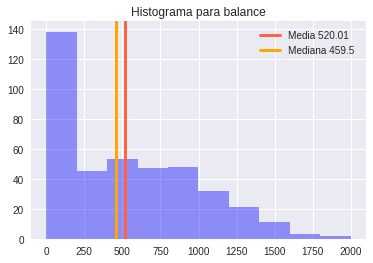

In [7]:
plot_hist(df,'balance')

#### En este caso, los datos se encuentran más distribuidos hacia la izquierda. Existe cierta variación entre media y mediana

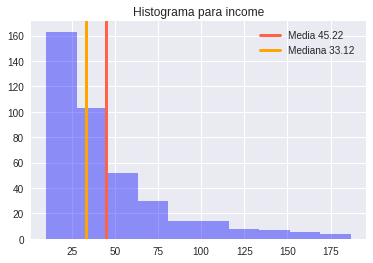

In [8]:
plot_hist(df,'income')

#### En este caso, los datos se encuentran más distribuidos hacia la izquierda. Existe cierta variación entre media y mediana

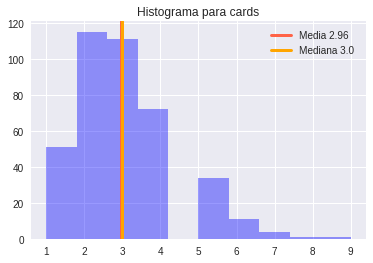

In [9]:
plot_hist(df,'cards')

#### En este caso, los valores de media y mediana coinciden lo suficiente

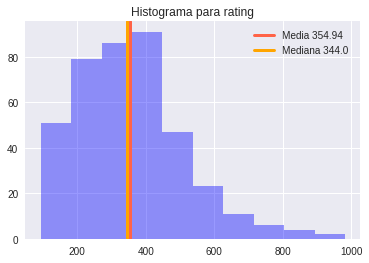

In [10]:
plot_hist(df,'rating')

#### En este caso, los datos se encuentran más distribuidos hacia la izquierda. Existe poca variación entre media y mediana

### Desafío 3: Regresión Lineal Simple

* A continuación generaremos una serie de modelos simples:

   ![alt text](image.png)


* Utilizando **statsmodels**, comente brevemente los siguientes puntos:

    * ¿Qué variable presenta un mayor poder explicativo de la variabilidad de Balance?
    * ¿Qué podemos decir sobre el comportamiento de Student?
        * ¿Qué pasa si aplicamos una prueba de hipótesis para muestras independientes de Balance entre aquellos que son y no son estudiantes?

In [11]:
print('Caso Student')
modelo_balance_student = smf.ols('balance ~ student',df)
modelo_balance_student = modelo_balance_student.fit()
modelo_balance_student.summary()

Caso Student


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                balance   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     28.62
Date:                Tue, 26 Nov 2019   Prob (F-statistic):           1.49e-07
Time:                        22:23:40   Log-Likelihood:                -3005.5
No. Observations:                 400   AIC:                             6015.
Df Residuals:                     398   BIC:                             6023.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    480.3694     23.434     20.499      0.000     434.300     526.439
student      396.4556     74.104      5.350      0.000     250.771     542.140
==============================================================================
Omnibus:                       20.866   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.920
Skew:                           0.544   Prob(JB):                     1.74e-05
Kurtosis:                       2.637   Cond. No.                         3.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

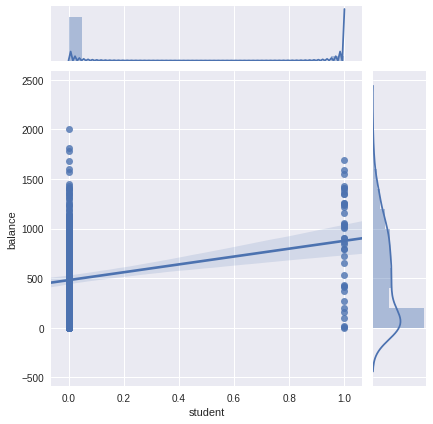

In [12]:
sns.jointplot("student", "balance", data=df, kind='reg');

In [13]:
print('Caso Income')
modelo_balance_student = smf.ols('balance ~ income',df)
modelo_balance_student = modelo_balance_student.fit()
modelo_balance_student.summary()

Caso Income


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                balance   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     109.0
Date:                Tue, 26 Nov 2019   Prob (F-statistic):           1.03e-22
Time:                        22:23:47   Log-Likelihood:                -2970.9
No. Observations:                 400   AIC:                             5946.
Df Residuals:                     398   BIC:                             5954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    246.5148     33.199      7.425      0.000     181.247     311.783
income         6.0484      0.579     10.440      0.000       4.909       7.187
==============================================================================
Omnibus:                       42.505   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.975
Skew:                           0.384   Prob(JB):                     2.79e-05
Kurtosis:                       2.182   Cond. No.                         93.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

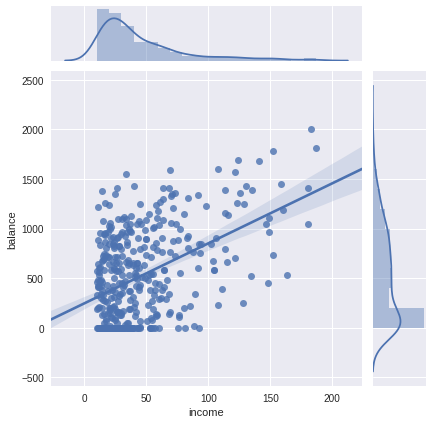

In [14]:
sns.jointplot("income", "balance", data=df, kind='reg');

In [15]:
print('Caso Rating')
modelo_balance_student = smf.ols('balance ~ rating',df)
modelo_balance_student = modelo_balance_student.fit()
modelo_balance_student.summary()

Caso Rating


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                balance   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     1168.
Date:                Tue, 26 Nov 2019   Prob (F-statistic):          1.90e-120
Time:                        22:23:55   Log-Likelihood:                -2745.4
No. Observations:                 400   AIC:                             5495.
Df Residuals:                     398   BIC:                             5503.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -390.8463     29.069    -13.446      0.000    -447.993    -333.699
rating         2.5662      0.075     34.176      0.000       2.419       2.714
==============================================================================
Omnibus:                       23.223   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.802
Skew:                           0.390   Prob(JB):                     3.75e-09
Kurtosis:                       4.311   Cond. No.                         970.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

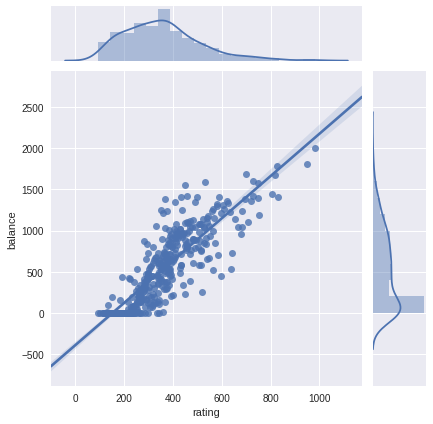

In [16]:
sns.jointplot("rating", "balance", data=df, kind='reg');

* ¿Qué variable presenta un mayor poder explicativo de la variabilidad de Balance?
    
    Revisando los tres resultados de R-squared, podemos concluir que en el caso de "rating" presenta un 0.746 
    de influencia sobre "balance", superior a los otros dos casos

* ¿Qué podemos decir sobre el comportamiento de Student?
    
    Posee un coeficiente de 396.4556 en la tabla, cuando revisamos su valor de probabilidad (P > |t|) obtenemos un resultado de 0.000 el cual puede ser considerado como significativo en función de la función de regresión lineal. Si observamos por su parte el valor de R-squared se observa que tiene un valor de 0.067 lo cual significa que la relación entre la variable student dentro del modelo planteado en este caso no es significativo

   * ¿Qué pasa si aplicamos una prueba de hipótesis para muestras independientes de Balance entre aquellos que son y no son estudiantes?

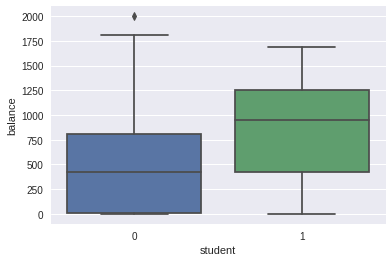

In [17]:
# Analizando previamente el comportamiento de estudiantes y no estudiantes

sns.boxplot(x="student", y="balance", data=df)

In [18]:
estudiantes = df[df['student'] == 1]['balance'].dropna()
no_estudiantes = df[df['student'] == 0]['balance'].dropna()

t, p = stats.ttest_ind(estudiantes, no_estudiantes)

media_estudiantes = np.mean(estudiantes)
media_no_estudiantes = np.mean(no_estudiantes)
mean_diff = media_estudiantes - media_no_estudiantes

print('H0: La media de los estudiantes y no estudiantes es la misma en función del balance')
print('H1: La media de los estudiantes y no estudiantes es distinta en función del balance')
print('\n')
print('Valor de t: {}'.format(t))
print('Valor de p-value: {}'.format(p))
print('Valor de media estudiantes: {}'.format(media_estudiantes))
print('Valor de media no estudiantes: {}'.format(media_no_estudiantes))
print('Diferencia de medias: {}'.format(mean_diff))

H0: La media de los estudiantes y no estudiantes es la misma en función del balance
H1: La media de los estudiantes y no estudiantes es distinta en función del balance


Valor de t: 5.349964123075003
Valor de p-value: 1.4877341077323024e-07
Valor de media estudiantes: 876.825
Valor de media no estudiantes: 480.36944444444447
Diferencia de medias: 396.4555555555556


In [19]:
1.4877341077323024e-07 > 0.05

False

Si tomamos en cuenta un alpha de = 0.05 al analizar nuestro p-value > alpha => 1.4877341077323024e-07 > 0.05 que se concluye como falso, por tanto no podemos dar por rechazada la Hipótesis Nula. 
De este otro método se confirma, la significancia del coeficiente de estudiantes obtenido previamente de 396.45

### Desafío 4: Genere un modelo que incluya todos los regresores

* Comente brevemente sobre el poder explicativo en la varianza de y las principales características de los predictores.

 ![alt text](image4.png)

In [20]:
formula = "balance ~ income + limit + rating + cards + age + education + student + married + asian + african_american + male"
modelo = smf.ols(formula, df)
modelo_fit = modelo.fit()
modelo_summary = modelo_fit.summary()

# Para realizar una comparación entre modelos lineales, puedo basarme a través del resultado del R-squared Adj.
# Para el caso de comparar modelos lineales entre si con diferentes variables y (comparación entre modelos lineal
# y modelo no lineal puedo realizar mi estudio a través del BIC, por tanto a menor BIC puedo determinar cual
# modelo se ajusta mejor
# Si P > | t | es 0.000 o es muy pequeño su nivel de variabilidad será mayor. Si el valor super el valor del 
# alpha, su nivel de variabilidad será menor

print(modelo_summary)

                            OLS Regression Results                            
Dep. Variable:                balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     750.3
Date:                Tue, 26 Nov 2019   Prob (F-statistic):          1.11e-253
Time:                        22:24:09   Log-Likelihood:                -2398.7
No. Observations:                 400   AIC:                             4821.
Df Residuals:                     388   BIC:                             4869.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -479.7541     34.717  

Del resultado general observado se puede determinar que la variabilidad se verá afectada mayoritariamente por aquiellos P > | t | sea más próximo a cero. Por tanto, podemos establecer que aquellas variables que afectan mayormente el resultado serían: income, limit, rating y student

In [21]:
def heatmap(df):
    """
    Función que genera heatmap

    Parameters:
    df (DataFrame): La función debe ingresar un objeto DataFrame

    Returns:
    Retorna un mapa de calor en función de la correlación de las variables

    """       
    plt.figure(figsize = (30,20))
    sns.set(font_scale=2)  
    corr_mat = df.corr()
    mask = np.zeros_like(corr_mat)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
         ax = sns.heatmap(corr_mat, mask=mask, vmax=.3, square=True, cmap='Blues', annot=True)
            

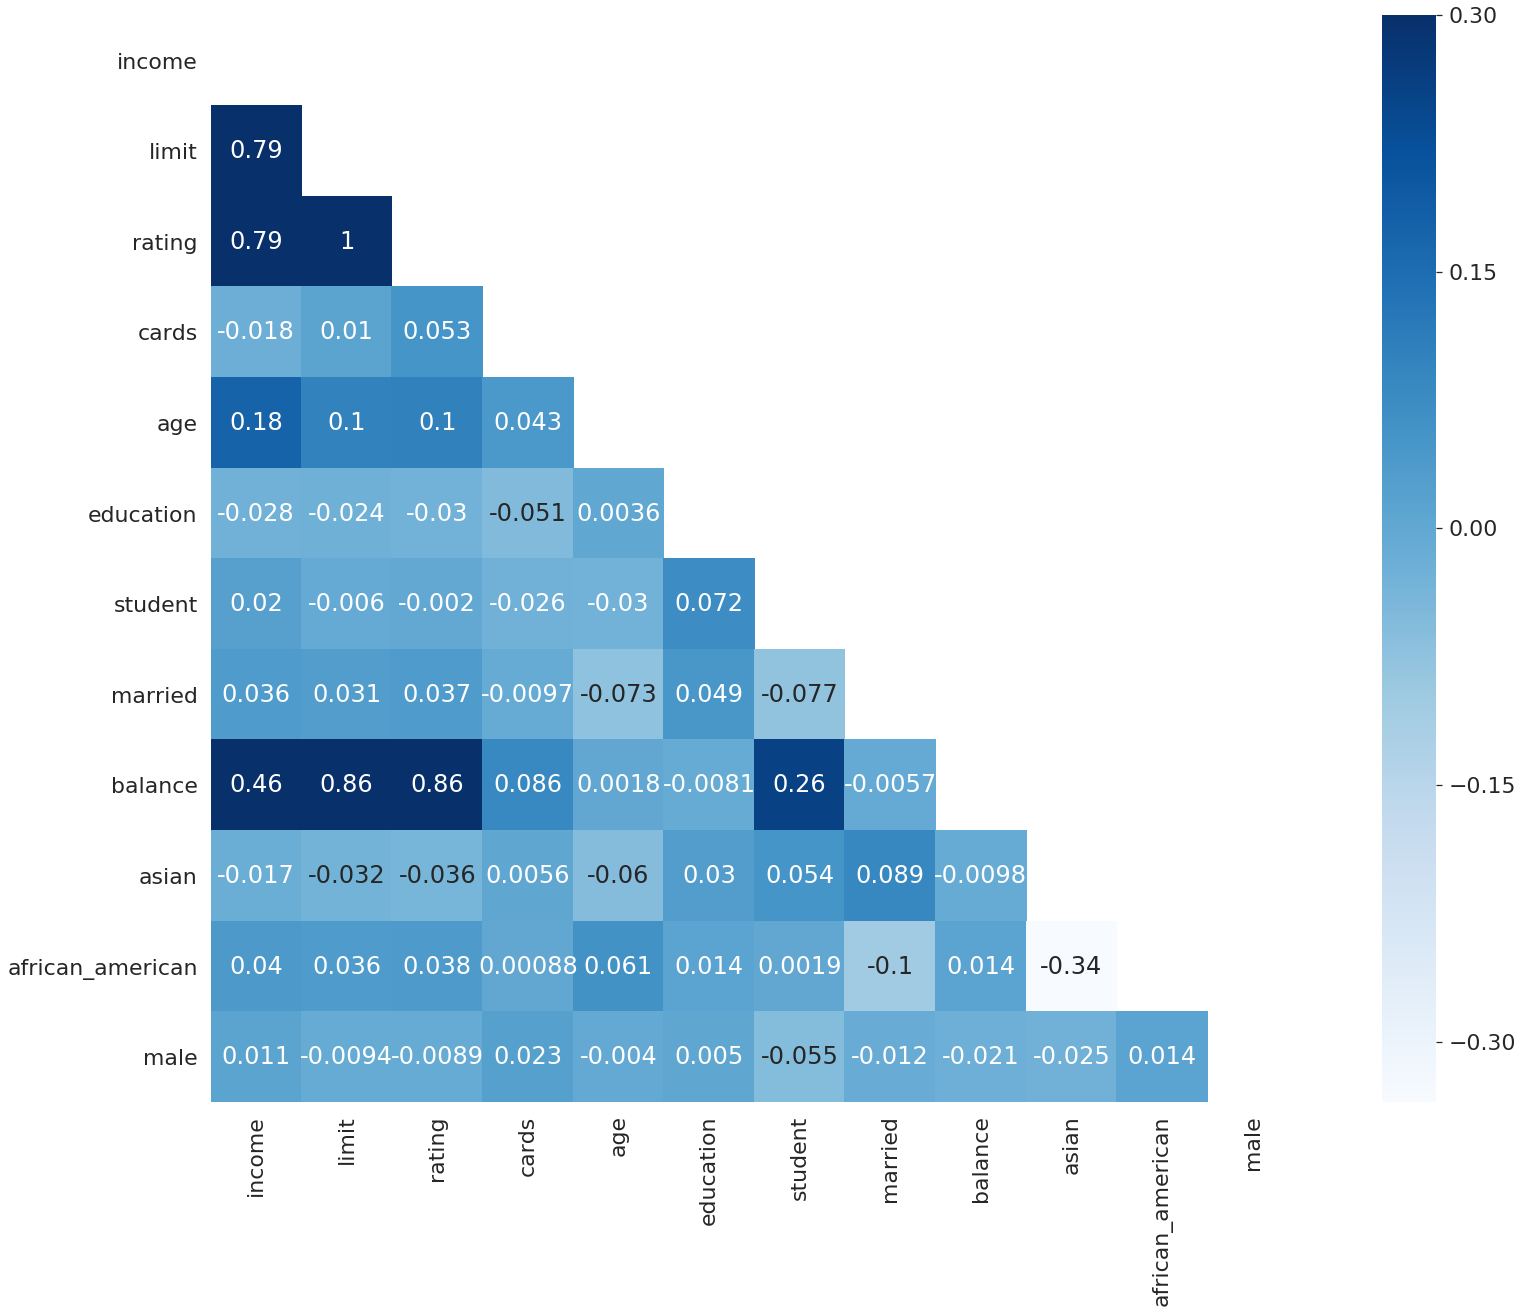

In [22]:
# Revisión del mapa de calor para tener idea de la correlación entre las variables
heatmap(df)

### Desafío 5: Depure el modelo e incluya sólo los predictores significativo

En base al modelo anterior, refactorize e incluya sólo las variables con un nivel de significancia

* Comente brevemente sobre el poder explicativo en la varianza de y las principales características de los predictores.

¿Mejoró o empeoró el modelo con la reducción de regresores?

In [23]:
formula_sin_asian = "balance ~ income + limit + rating + cards + age + education + student + married + african_american + male"
modelo_sin_asian = smf.ols(formula_sin_asian, df)
modelo_fit_sin_asian = modelo_sin_asian.fit()
modelo_summary_sin_asian = modelo_fit_sin_asian.summary()

print(modelo_summary_sin_asian)

                            OLS Regression Results                            
Dep. Variable:                balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     826.8
Date:                Tue, 26 Nov 2019   Prob (F-statistic):          4.40e-255
Time:                        22:24:16   Log-Likelihood:                -2398.8
No. Observations:                 400   AIC:                             4820.
Df Residuals:                     389   BIC:                             4864.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -477.1743     34.371  

No hay mucha diferencia en los resultados obtenidos en función de R-squared y R-squared-adjust, por ende puede descartarse la variable "asian"

In [24]:
formula_sin_education = "balance ~ income + limit + rating + cards + age + student + married + african_american + male"
modelo_sin_education = smf.ols(formula_sin_education, df)
modelo_fit_sin_education = modelo_sin_education.fit()
modelo_summary_sin_education = modelo_fit_sin_education.summary()

print(modelo_summary_sin_education)

                            OLS Regression Results                            
Dep. Variable:                balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     919.9
Date:                Tue, 26 Nov 2019   Prob (F-statistic):          1.77e-256
Time:                        22:24:21   Log-Likelihood:                -2399.1
No. Observations:                 400   AIC:                             4818.
Df Residuals:                     390   BIC:                             4858.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -492.1476     26.230  

No hay mucha diferencia en los resultados obtenidos en función de R-squared y R-squared-adjust, por ende puede descartarse la variable "education"

In [25]:
formula_sin_married = "balance ~ income + limit + rating + cards + age + student + african_american + male"
modelo_sin_married = smf.ols(formula_sin_married, df)
modelo_fit_sin_married = modelo_sin_married.fit()
modelo_summary_sin_married = modelo_fit_sin_married.summary()

print(modelo_summary_sin_married)

                            OLS Regression Results                            
Dep. Variable:                balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1036.
Date:                Tue, 26 Nov 2019   Prob (F-statistic):          7.56e-258
Time:                        22:24:23   Log-Likelihood:                -2399.4
No. Observations:                 400   AIC:                             4817.
Df Residuals:                     391   BIC:                             4853.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -497.7120     25.365  

No hay mucha diferencia en los resultados obtenidos en función de R-squared y R-squared-adjust, por ende puede descartarse la variable "married"

In [26]:
formula_sin_african = "balance ~ income + limit + rating + cards + age + student  + male"
modelo_sin_african = smf.ols(formula_sin_african, df)
modelo_fit_sin_african = modelo_sin_african.fit()
modelo_summary_sin_african = modelo_fit_sin_african.summary()

print(modelo_summary_sin_african)

                            OLS Regression Results                            
Dep. Variable:                balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1183.
Date:                Tue, 26 Nov 2019   Prob (F-statistic):          3.50e-259
Time:                        22:24:26   Log-Likelihood:                -2400.0
No. Observations:                 400   AIC:                             4816.
Df Residuals:                     392   BIC:                             4848.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -499.0690     25.329    -19.703      0.0

No hay mucha diferencia en los resultados obtenidos en función de R-squared y R-squared-adjust, por ende puede descartarse la variable "african_american"

In [27]:
formula_sin_male = "balance ~ income + limit + rating + cards + age + student"
modelo_sin_male = smf.ols(formula_sin_male, df)
modelo_fit_sin_male = modelo_sin_male.fit()
modelo_summary_sin_male = modelo_fit_sin_male.summary()

print(modelo_summary_sin_male)


                            OLS Regression Results                            
Dep. Variable:                balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1380.
Date:                Tue, 26 Nov 2019   Prob (F-statistic):          1.58e-260
Time:                        22:24:28   Log-Likelihood:                -2400.5
No. Observations:                 400   AIC:                             4815.
Df Residuals:                     393   BIC:                             4843.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -493.7342     24.825    -19.889      0.0

No hay mucha diferencia en los resultados obtenidos en función de R-squared y R-squared-adjust, por ende puede descartarse la variable "male"

In [28]:
formula_sin_age = "balance ~ income + limit  + cards  + student + rating"
modelo_sin_age = smf.ols(formula_sin_age, df)
modelo_fit_sin_age = modelo_sin_age.fit()
modelo_summary_sin_age = modelo_fit_sin_age.summary()

print(modelo_summary_sin_age)

                            OLS Regression Results                            
Dep. Variable:                balance   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1640.
Date:                Tue, 26 Nov 2019   Prob (F-statistic):          3.60e-261
Time:                        22:24:31   Log-Likelihood:                -2402.8
No. Observations:                 400   AIC:                             4818.
Df Residuals:                     394   BIC:                             4842.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -526.1555     19.747    -26.645      0.0

No hay mucha diferencia en los resultados obtenidos en función de R-squared y R-squared-adjust, por ende puede descartarse la variable "age"

In [29]:
formula_sin_rating = "balance ~ income + limit  + cards  + student"
modelo_sin_rating = smf.ols(formula_sin_rating, df)
modelo_fit_sin_rating = modelo_sin_rating.fit()
modelo_summary_sin_rating = modelo_fit_sin_rating.summary()

print(modelo_summary_sin_rating)

                            OLS Regression Results                            
Dep. Variable:                balance   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     2029.
Date:                Tue, 26 Nov 2019   Prob (F-statistic):          8.94e-262
Time:                        22:24:33   Log-Likelihood:                -2405.4
No. Observations:                 400   AIC:                             4821.
Df Residuals:                     395   BIC:                             4841.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -499.7272     15.890    -31.449      0.0

Se disminuye ligeramente el resultado del R-squared ajustado, por lo que se puede descartar la variable "rating"

In [30]:
modelo_def = modelo_fit_sin_rating
modelo_def.pvalues

Intercept    1.337886e-109
income       1.504775e-118
limit        2.494177e-236
cards         5.323790e-10
student       5.271329e-87
dtype: float64

En función de los resultados anteriores en función del p-value podemos decir que cards sería la próxima variable que se puede descartar. 

La comparación del modelo inicial y luego el total podemos decir que la diferencia en función de los valores de Adj R-squared y la diferencia entre el BIC del modelo general y el modelo reducido supera el valor de 10, por ende podemos determinar que se tiene el modelo óptimo lineal para balance en este caso

### Desafío 6:

Utilizando lmplot de seaborn , inspeccione el comportamiento de los tres principales determinantes.

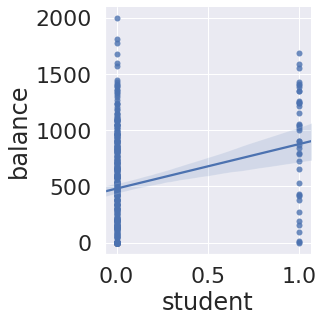

In [31]:
sns.lmplot('student', 'balance', df)

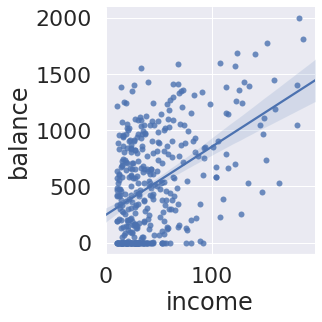

In [32]:
sns.lmplot('income', 'balance', df)

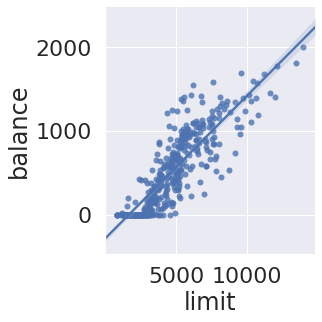

In [33]:
sns.lmplot('limit', 'balance', df)